In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#NEW

In [ ]:
import IPython.display as ipd
import librosa

# Load the MP3 audio file
audio_file = '/content/drive/MyDrive/sml data /Audio/Tetra Packs Out/amul (mp3cut.net) (19).mp3'
y, sr = librosa.load(audio_file, sr=None)

# Normalize the audio signal
y_normalized = librosa.util.normalize(y)

# Display the original audio
print("Original Audio:")
ipd.display(ipd.Audio(y, rate=sr))

# Display the normalized audio
print("Normalized Audio:")
ipd.display(ipd.Audio(y_normalized, rate=sr))


Original Audio:


Normalized Audio:


##Preprocessing

In [ ]:
from moviepy.editor import VideoFileClip

# Function to extract audio from video
def extract_audio(video_file, audio_file):
    video_clip = VideoFileClip(video_file)
    audio_clip = video_clip.audio
    audio_clip.write_audiofile(audio_file)

    # Close the video clip
    video_clip.close()

# Input and output file paths
video_file = '/content/drive/MyDrive/sml data /Videos Trimmed/printer_more_trimmed.mov'
audio_file = 'printer.wav'

# Extract audio from the video file
extract_audio(video_file, audio_file)


MP3 files are compressed and lossy, meaning they sacrifice some audio quality to achieve smaller file sizes. Whereas WAV files are uncompressed and lossless, meaning they preserve the original audio data without any loss of quality.

In [ ]:
# Converting the format of the files to .wav format
import os
from pydub import AudioSegment

def convert_mp3_to_wav(mp3_file, wav_file):
    sound = AudioSegment.from_file(mp3_file, format="mp3")
    sound.export(wav_file, format="wav")

def batch_convert_mp3_to_wav(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through all files in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(".mp3"):
            mp3_file = os.path.join(input_folder, filename)
            wav_file = os.path.join(output_folder, os.path.splitext(filename)[0] + ".wav")
            convert_mp3_to_wav(mp3_file, wav_file)

batch_convert_mp3_to_wav("/content/drive/MyDrive/sml data /Audio/output_folder", "/content/drive/MyDrive/sml data /Audio/Tetra Packs ")

In [ ]:
import os
import librosa

# Function to check sampling rate of audio files in a folder
def check_sampling_rate(audio_dir):
    sampling_rates = set()  # Set to store unique sampling rates
    for class_folder in os.listdir(audio_dir):
        class_folder_path = os.path.join(audio_dir, class_folder)
        for audio_file in os.listdir(class_folder_path):
            audio_file_path = os.path.join(class_folder_path, audio_file)
            sr = librosa.get_samplerate(audio_file_path)
            sampling_rates.add(sr)
            print(f"File: {audio_file}, Sampling Rate: {sr}")
    return sampling_rates

# Path to the directory containing audio files
audio_dir = '/content/drive/MyDrive/sml data /Extracted Audio'

# Checking sampling rates
sampling_rates = check_sampling_rate(audio_dir)
print("Unique Sampling Rates:", sampling_rates)


File: cardboard5.wav, Sampling Rate: 48000
File: cardboard2.wav, Sampling Rate: 48000
File: cardboard9.wav, Sampling Rate: 48000
File: cardboard4.wav, Sampling Rate: 48000
File: cardboard1.wav, Sampling Rate: 48000
File: cardboard8.wav, Sampling Rate: 48000
File: cardboard7.wav, Sampling Rate: 48000
File: cardboard11.wav, Sampling Rate: 48000
File: cardboard3.wav, Sampling Rate: 48000
File: cardboard6.wav, Sampling Rate: 48000
File: cardboard10.wav, Sampling Rate: 48000
File: cardboard13.wav, Sampling Rate: 48000
File: cardboard16.wav, Sampling Rate: 48000
File: cardboard19.wav, Sampling Rate: 48000
File: cardboard18.wav, Sampling Rate: 48000
File: cardboard15.wav, Sampling Rate: 48000
File: cardboard14.wav, Sampling Rate: 48000
File: cardboard20.wav, Sampling Rate: 48000
File: cardboard12.wav, Sampling Rate: 48000
File: cardboard17.wav, Sampling Rate: 48000
File: cardboard21.wav, Sampling Rate: 48000
File: cardboard23.wav, Sampling Rate: 48000
File: cardboard22.wav, Sampling Rate: 480

In [ ]:
# Resampling
import os
import librosa
import soundfile as sf
from tqdm import tqdm

# Function to resample audio files in a folder
def resample_audio_files(audio_dir, target_sr):
    for class_folder in os.listdir(audio_dir):
        class_folder_path = os.path.join(audio_dir, class_folder)
        for audio_file in tqdm(os.listdir(class_folder_path), desc=f"Resampling {class_folder}"):
            audio_file_path = os.path.join(class_folder_path, audio_file)
            # Load audio file with desired target sampling rate
            y, sr = librosa.load(audio_file_path, sr=target_sr)
            # Save resampled audio file using soundfile
            sf.write(audio_file_path, y, target_sr)

# Path to the directory containing audio files
audio_dir = '/content/drive/MyDrive/sml data /Extracted Audio'

# Resample audio files to 48000 Hz
resample_audio_files(audio_dir, target_sr=48000)

# import os
# import librosa
# import soundfile as sf
# from tqdm import tqdm

# def resample_audio_files(audio_dir, target_sr):
#     for root, dirs, files in os.walk(audio_dir):
#         for file in tqdm(files, desc="Resampling"):
#             if file.endswith(".wav"):  # Adjust the file extension if needed
#                 file_path = os.path.join(root, file)
#                 # Load audio file with desired target sampling rate
#                 y, sr = librosa.load(file_path, sr=target_sr)
#                 # Save resampled audio file using soundfile
#                 sf.write(file_path, y, target_sr)

# # Path to the directory containing audio files
# audio_dir = '/content/drive/MyDrive/sml data /Extracted Audio'

# # Resample audio files to 48000 Hz
# resample_audio_files(audio_dir, target_sr=48000)



Resampling Non-Recyclable: 100%|██████████| 246/246 [00:04<00:00, 59.76it/s]


In [ ]:
import os
import librosa

# Function to check sampling rate of audio files in nested folders
def check_sampling_rate_recursive(root_dir):
    sampling_rates = set()  # Set to store unique sampling rates
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith(".wav"):  # Adjust file format if needed
                file_path = os.path.join(root, file)
                # Load audio file and get its sampling rate
                sr = librosa.get_samplerate(file_path)
                sampling_rates.add(sr)
                print(f"File: {file_path}, Sampling Rate: {sr}")
    return sampling_rates

# Root directory containing nested folders of audio files
root_dir = '/content/drive/MyDrive/sml data /Extracted Audio'

# Check sampling rates recursively

sampling_rates = check_sampling_rate_recursive(root_dir)
print("Unique Sampling Rates:", sampling_rates)


File: /content/drive/MyDrive/sml data /Extracted Audio/Recyclable/cardboard5.wav, Sampling Rate: 48000
File: /content/drive/MyDrive/sml data /Extracted Audio/Recyclable/cardboard2.wav, Sampling Rate: 48000
File: /content/drive/MyDrive/sml data /Extracted Audio/Recyclable/cardboard9.wav, Sampling Rate: 48000
File: /content/drive/MyDrive/sml data /Extracted Audio/Recyclable/cardboard4.wav, Sampling Rate: 48000
File: /content/drive/MyDrive/sml data /Extracted Audio/Recyclable/cardboard1.wav, Sampling Rate: 48000
File: /content/drive/MyDrive/sml data /Extracted Audio/Recyclable/cardboard8.wav, Sampling Rate: 48000
File: /content/drive/MyDrive/sml data /Extracted Audio/Recyclable/cardboard7.wav, Sampling Rate: 48000
File: /content/drive/MyDrive/sml data /Extracted Audio/Recyclable/cardboard11.wav, Sampling Rate: 48000
File: /content/drive/MyDrive/sml data /Extracted Audio/Recyclable/cardboard3.wav, Sampling Rate: 48000
File: /content/drive/MyDrive/sml data /Extracted Audio/Recyclable/cardbo

In [ ]:
# Normalizing
import os
import numpy as np
import librosa

def normalize_audio_dir(audio_dir):
    normalized_audio_clips = []
    # Recursively walk through the directory tree
    for root, _, files in os.walk(audio_dir):
        for file in files:
            file_path = os.path.join(root, file)
            # Check if the file is an audio file
            if file.lower().endswith(('.wav', '.mp3')):
                audio_data, _ = librosa.load(file_path, sr=None)
                max_abs = np.max(np.abs(audio_data))
                normalized_audio = audio_data / max_abs if max_abs != 0 else audio_data
                normalized_audio_clips.append(normalized_audio)
    return normalized_audio_clips

audio_dir = '/content/drive/MyDrive/sml data /Extracted Audio'  # Main directory containing audio files
normalized_audio_clips = normalize_audio_dir(audio_dir)


##Feature Extraction

###MFCC

In [ ]:
# Function to extract MFCC features from audio files
def extract_features(audio_path, mfcc_max_pad_len=100):
    audio_data, _ = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio_data, sr=48000)
    # Pad or truncate MFCCs to consistent length
    if mfccs.shape[1] < mfcc_max_pad_len:
        pad_width = mfcc_max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :mfcc_max_pad_len]
    return mfccs

audio_dir = '/content/drive/MyDrive/sml data /Extracted Audio'



In [ ]:
# Initialize lists to store features and labels
X = []
y = []

In [ ]:
# Loop through each class folder
for class_folder in os.listdir(audio_dir):
    class_folder_path = os.path.join(audio_dir, class_folder)
    # Loop through each audio file in the class folder
    for audio_file in os.listdir(class_folder_path):
        audio_file_path = os.path.join(class_folder_path, audio_file)
        # Extract features from audio file
        mfcc_features = extract_features(audio_file_path)
        X.append(mfcc_features.flatten())  # Flatten MFCC features into a 1D array
        y.append(class_folder)  # Label for the audio file (class name)

# for root, dirs, files in os.walk(root_dir):
#     for file in files:
#         if file.endswith(".wav"):  # Adjust file format if needed
#             audio_file_path = os.path.join(root, file)
#             class_folder = os.path.basename(os.path.dirname(audio_file_path))  # Extract class label
#             # Extract features from audio file
#             mfcc_features = extract_features(audio_file_path)
#             X.append(mfcc_features)  # Append MFCC features
#             y.append(class_folder)  # Append class label


In [ ]:
print(mfcc_features.shape[0])

20


In [ ]:
print(X)


[array([-632.6765 , -618.0026 , -548.18225, ...,    0.     ,    0.     ,
          0.     ], dtype=float32), array([-573.4024 , -566.2159 , -561.17236, ...,    0.     ,    0.     ,
          0.     ], dtype=float32), array([-627.85126, -611.87805, -600.81604, ...,    0.     ,    0.     ,
          0.     ], dtype=float32), array([-556.1756, -548.5713, -544.7631, ...,    0.    ,    0.    ,
          0.    ], dtype=float32), array([-536.22186, -524.4972 , -519.37366, ...,    0.     ,    0.     ,
          0.     ], dtype=float32), array([-630.5729 , -564.64844, -438.43744, ...,    0.     ,    0.     ,
          0.     ], dtype=float32), array([-5.3678760e+02, -5.2715094e+02, -5.2683777e+02, ...,
        8.8834314e+00,  7.1552200e+00, -4.3601945e-01], dtype=float32), array([-539.13165  , -531.471    , -527.0317   , ...,    4.5831785,
          3.4884186,   -1.0642457], dtype=float32), array([-555.3781 , -544.02856, -538.4278 , ...,    0.     ,    0.     ,
          0.     ], dtype=float32

In [ ]:
print(y)

['Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recyclable', 'Recy

In [ ]:
# Convert features and labels to DataFrame
import pandas as pd
data = pd.DataFrame(X)
data['label'] = y

In [ ]:
# Save DataFrame to CSV
csv_file_path = '/content/drive/MyDrive/sml data /Features/Audio Features.csv'  # Provide the desired path
data.to_csv(csv_file_path, index=False)

##Model

In [ ]:
# Convert lists to numpy arrays
import numpy as np
X = np.array(X)
y = np.array(y)

In [ ]:
print(X.shape)

(551, 2000)


In [ ]:
print(y.shape)

(551,)


In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)

(440, 2000)


Random Forest

In [ ]:
# Create a Random Forest Model
rf_classifier = RandomForestClassifier()

# Initialize a parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')

# Perform grid search cross-validation
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Best Score : ",grid_search.best_score_)
print("Accuracy:", accuracy)

Best Parameters: {'max_depth': 10, 'n_estimators': 150}
Best Score :  0.9704545454545455
Accuracy: 0.9819819819819819


In [ ]:

# Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth = 20)
rf_classifier.fit(X_train, y_train)

# Training accuracy
y_train_pred = rf_classifier.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy)

# Testing accuracy
y_test_pred = rf_classifier.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", testing_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.9819819819819819


In [ ]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9819819819819819


In [ ]:
print('Accuracy with MFCC: 0.9181818181818182 ')
print('Accuracy with Mel Spectrum : 0.9090909090909091')

Accuracy with MFCC: 0.9181818181818182 
Accuracy with Mel Spectrum : 0.9090909090909091


In [ ]:
import pickle

# Save the trained Random Forest classifier to a file
with open('random_forest_model', 'wb') as file:
    pickle.dump(rf_classifier, file)


Knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
knn_classifier = KNeighborsClassifier()

# Initialize a parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='accuracy')

# Perform grid search cross-validation
grid_search_knn.fit(X_train, y_train)

best_params_knn = grid_search_knn.best_params_
best_estimator_knn = grid_search_knn.best_estimator_

# Make predictions on the test set using the best estimator
y_pred_knn = best_estimator_knn.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Best Parameters (kNN):", best_params_knn)
print("Best Score (kNN): ",grid_search_knn.best_score_)
print("Accuracy (kNN):", accuracy_knn)

In [ ]:
# Initialize kNN classifier with best parameters from grid search
knn_classifier_best = KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'], weights=best_params_knn['weights'])

# Train the kNN classifier with the best parameters
knn_classifier_best.fit(X_train, y_train)

# Training accuracy with best parameters
y_train_pred_knn_best = knn_classifier_best.predict(X_train)
training_accuracy_knn_best = accuracy_score(y_train, y_train_pred_knn_best)
print("Training Accuracy (kNN - Best Parameters):", training_accuracy_knn_best)

# Testing accuracy with best parameters
y_test_pred_knn_best = knn_classifier_best.predict(X_test)
testing_accuracy_knn_best = accuracy_score(y_test, y_test_pred_knn_best)
print("Testing Accuracy (kNN - Best Parameters):", testing_accuracy_knn_best)


Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC()

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}

# Initialize GridSearchCV
grid_search_svc = GridSearchCV(svm_classifier, param_grid_svc, cv=5, scoring='accuracy')

# Perform grid search cross-validation
grid_search_svc.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_svc = grid_search_svc.best_params_
best_estimator_svc = grid_search_svc.best_estimator_

# Make predictions on the test set using the best estimator
y_pred_svc = best_estimator_svc.predict(X_test)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("Best Parameters (SVC):", best_params_svc)
print("Best Score (SVC):", grid_search_svc.best_score_)
print("Accuracy (SVC):", accuracy_svc)


Best Parameters (SVC): {'C': 0.1, 'kernel': 'linear'}
Best Score (SVC): 0.9522727272727274
Accuracy (SVC): 0.9819819819819819


In [ ]:
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svc = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy:", accuracy)

Accuracy: 0.9819819819819819


In [ ]:
print('Accuracy with MFCC: 0.8818181818181818 ')
print('Accuracy with Mel Spectrum : 0.9181818181818182')

Accuracy with MFCC: 0.8818181818181818 
Accuracy with Mel Spectrum : 0.9181818181818182


In [ ]:
import pickle

# Save the trained Random Forest classifier to a file
with open('svm_model_mfcc.pkl', 'wb') as file:
    pickle.dump(svm_classifier, file)


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5, scoring='accuracy')

# Perform grid search cross-validation
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_dt = grid_search_dt.best_params_
best_estimator_dt = grid_search_dt.best_estimator_

# Make predictions on the test set using the best estimator
y_pred_dt = best_estimator_dt.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Best Parameters (Decision Tree):", best_params_dt)
print("Best Score (Decision Tree):", grid_search_dt.best_score_)
print("Accuracy (Decision Tree):", accuracy_dt)

Best Parameters (Decision Tree): {'max_depth': 20, 'min_samples_split': 2}
Best Score (Decision Tree): 0.8954545454545453
Accuracy (Decision Tree): 0.8108108108108109


In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth =  20, min_samples_split = 2)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.8288288288288288


In [ ]:
print('Accuracy with MFCC: 0.6181818181818182 ')
print('Accuracy with Mel Spectrum : 0.7454545454545455')

Accuracy with MFCC: 0.6181818181818182 
Accuracy with Mel Spectrum : 0.7454545454545455


In [ ]:
import pickle

# Save the trained Random Forest classifier to a file
with open('decisionTree_model.pkl', 'wb') as file:
    pickle.dump(dt_classifier, file)


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)

Accuracy: 0.8288288288288288


In [ ]:
print('Accuracy with MFCC: 0.9181818181818182 ')
print('Accuracy with Mel Spectrum : 0.8')

Accuracy with MFCC: 0.9181818181818182 
Accuracy with Mel Spectrum : 0.8


In [ ]:
with open('naiveBayes_model', 'wb') as file:
    pickle.dump(nb_classifier, file)


Training Accuracy: 0.8931818181818182


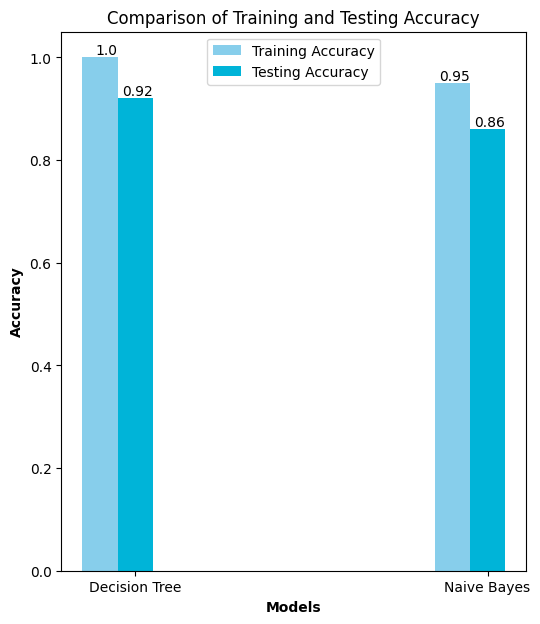

In [ ]:
import matplotlib.pyplot as plt

rf_train_acc = 1.0
rf_test_acc = 0.92

# Training accuracy
y_train_pred_nb = nb_classifier.predict(X_train)
training_accuracy_nb = accuracy_score(y_train, y_train_pred_nb)
print("Training Accuracy:", training_accuracy_nb)

nb_train_acc = 0.95
nb_test_acc = 0.86

# Data for plotting
models = ['Decision Tree', 'Naive Bayes']
train_acc = [rf_train_acc, nb_train_acc]
test_acc = [rf_test_acc, nb_test_acc]

# Setting the positions and width for the bars
pos = list(range(len(models)))
width = 0.1

# Plotting the bars
fig, ax = plt.subplots(figsize=(6, 7))
plt.bar(pos, train_acc, width, color='#87ceeb', label='Training Accuracy')
plt.bar([p + width for p in pos], test_acc, width, color='#00b4d8', label='Testing Accuracy')


# Adding labels, title, and legend
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Comparison of Training and Testing Accuracy')
plt.xticks([p + width for p in pos], models)
for i in range(len(pos)):
    plt.text(pos[i] + width / 2, train_acc[i], str(train_acc[i]), ha='right', va='bottom')
    plt.text(pos[i] + 3 * width / 2, test_acc[i], str(test_acc[i]), ha='right', va='bottom')
plt.legend(loc = 'upper center')

# Display the plot
plt.show()

##testing

In [ ]:
import librosa
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Function to extract MFCC features from an audio file
def extract_features(audio_path, mfcc_max_pad_len=100):
    audio_data, _ = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio_data, sr=48000)
    # Pad or truncate MFCCs to consistent length
    if mfccs.shape[1] < mfcc_max_pad_len:
        pad_width = mfcc_max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :mfcc_max_pad_len]
    return mfccs.flatten()


audio_file_path = '/content/drive/MyDrive/sml data /purana data/Audio/Box/box (mp3cut.net) (20).wav'

# Extract features from the audio file
features = extract_features(audio_file_path)

# Make prediction using the trained Random Forest classifier
predicted_label_rf = rf_classifier.predict([features])[0]
predicted_label_nb = nb_classifier.predict([features])[0]
predicted_label_dt = dt_classifier.predict([features])[0]
predicted_label_svc = svm_classifier.predict([features])[0]
#predicted_label_rf = rf_classifier.predict([features])[0]

print("Predicted Label:", predicted_label_rf)
print("Predicted Label:", predicted_label_nb)
print("Predicted Label:", predicted_label_dt)
print("Predicted Label:", predicted_label_svc)



Predicted Label: Recyclable
Predicted Label: Non-Recyclable
Predicted Label: Recyclable
Predicted Label: Non-Recyclable


In [ ]:
import librosa
import numpy as np
from sklearn.ensemble import RandomForestClassifier

def extract_features(audio_path, n_mels=128, duration=5, mel_shape=(128, 128)):
    audio_data, _ = librosa.load(audio_path, sr=None, duration=duration)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=44100, n_mels=n_mels)
    # Convert amplitude to dB (log scale)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    # Resize Mel spectrogram to a fixed shape
    mel_spectrogram_resized = np.resize(mel_spectrogram_db, mel_shape)
    return mel_spectrogram_resized.flatten()

# Path to the single audio file you want to test
audio_file_path = ['/content/bottle (mp3cut.net).wav',
                   '/content/box (mp3cut.net) (51).wav',
                   '/content/paper balls (mp3cut.net) (44).wav',
                   '/content/printer (mp3cut.net) (19).wav',
                   '/content/cd (1) (mp3cut.net) (4).wav',
                   '/content/foil (mp3cut.net) (1).wav',
                   '/content/tetra pack (mp3cut.net) (10) (1).wav',
                   '/content/wrapper4 (mp3cut.net) (5).wav',
                   '/content/fork (mp3cut.net) (43).wav',
                   '/content/container1 (mp3cut.net) (6) (1).wav']

# Extract features from the audio file
features = extract_features(audio_file_path[0])

# Make prediction using the trained Random Forest classifier
predicted_label_rf = rf_classifier.predict([features])[0]
predicted_label_nb = nb_classifier.predict([features])[0]
predicted_label_dt = dt_classifier.predict([features])[0]
predicted_label_svc = svm_classifier.predict([features])[0]
#predicted_label_rf = rf_classifier.predict([features])[0]

print("Predicted Label:", predicted_label_rf)
print("Predicted Label:", predicted_label_nb)
print("Predicted Label:", predicted_label_dt)
print("Predicted Label:", predicted_label_svc)



<ipython-input-40-b178ae4e2f84>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, _ = librosa.load(audio_path, sr=None, duration=duration)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: '/content/bottle (mp3cut.net).wav'

In [ ]:
# Extract features from the audio file
features = extract_features(audio_file_path[1])

# Make prediction using the trained Random Forest classifier
predicted_label_rf = rf_classifier.predict([features])[0]
predicted_label_nb = nb_classifier.predict([features])[0]
predicted_label_dt = dt_classifier.predict([features])[0]
predicted_label_svc = svm_classifier.predict([features])[0]
#predicted_label_rf = rf_classifier.predict([features])[0]

print("Predicted Label:", predicted_label_rf)
print("Predicted Label:", predicted_label_nb)
print("Predicted Label:", predicted_label_dt)
print("Predicted Label:", predicted_label_svc)


Predicted Label: foil
Predicted Label: foil
Predicted Label: Bottle
Predicted Label: paper balls


In [ ]:
# Extract features from the audio file
#features = extract_features(audio_file_path[2])
features = extract_features('/content/drive/MyDrive/sml data /Audio/paper balls/paper balls (mp3cut.net) (11).wav')

# Make prediction using the trained Random Forest classifier
predicted_label_rf = rf_classifier.predict([features])[0]
predicted_label_nb = nb_classifier.predict([features])[0]
predicted_label_dt = dt_classifier.predict([features])[0]
predicted_label_svc = svm_classifier.predict([features])[0]
#predicted_label_rf = rf_classifier.predict([features])[0]

print("Predicted Label:", predicted_label_rf)
print("Predicted Label:", predicted_label_nb)
print("Predicted Label:", predicted_label_dt)
print("Predicted Label:", predicted_label_svc)


Predicted Label: paper balls
Predicted Label: paper balls
Predicted Label: paper balls
Predicted Label: paper balls


In [ ]:
# Extract features from the audio file
features = extract_features(audio_file_path[3])

# Make prediction using the trained Random Forest classifier
predicted_label_rf = rf_classifier.predict([features])[0]
predicted_label_nb = nb_classifier.predict([features])[0]
predicted_label_dt = dt_classifier.predict([features])[0]
predicted_label_svc = svm_classifier.predict([features])[0]
#predicted_label_rf = rf_classifier.predict([features])[0]

print("Predicted Label:", predicted_label_rf)
print("Predicted Label:", predicted_label_nb)
print("Predicted Label:", predicted_label_dt)
print("Predicted Label:", predicted_label_svc)


Predicted Label: Cartridge
Predicted Label: Cartridge
Predicted Label: CD
Predicted Label: Cartridge


In [ ]:
# Extract features from the audio file
features = extract_features(audio_file_path[4])

# Make prediction using the trained Random Forest classifier
predicted_label_rf = rf_classifier.predict([features])[0]
predicted_label_nb = nb_classifier.predict([features])[0]
predicted_label_dt = dt_classifier.predict([features])[0]
predicted_label_svc = svm_classifier.predict([features])[0]
#predicted_label_rf = rf_classifier.predict([features])[0]

print("Predicted Label:", predicted_label_rf)
print("Predicted Label:", predicted_label_nb)
print("Predicted Label:", predicted_label_dt)
print("Predicted Label:", predicted_label_svc)


Predicted Label: CD
Predicted Label: CD
Predicted Label: CD
Predicted Label: CD


In [ ]:
# Extract features from the audio file
features = extract_features(audio_file_path[5])

# Make prediction using the trained Random Forest classifier
predicted_label_rf = rf_classifier.predict([features])[0]
predicted_label_nb = nb_classifier.predict([features])[0]
predicted_label_dt = dt_classifier.predict([features])[0]
predicted_label_svc = svm_classifier.predict([features])[0]
#predicted_label_rf = rf_classifier.predict([features])[0]

print("Predicted Label:", predicted_label_rf)
print("Predicted Label:", predicted_label_nb)
print("Predicted Label:", predicted_label_dt)
print("Predicted Label:", predicted_label_svc)


Predicted Label: foil
Predicted Label: foil
Predicted Label: foil
Predicted Label: foil


In [ ]:
# Extract features from the audio file
features = extract_features(audio_file_path[6])

# Make prediction using the trained Random Forest classifier
predicted_label_rf = rf_classifier.predict([features])[0]
predicted_label_nb = nb_classifier.predict([features])[0]
predicted_label_dt = dt_classifier.predict([features])[0]
predicted_label_svc = svm_classifier.predict([features])[0]
#predicted_label_rf = rf_classifier.predict([features])[0]

print("Predicted Label:", predicted_label_rf)
print("Predicted Label:", predicted_label_nb)
print("Predicted Label:", predicted_label_dt)
print("Predicted Label:", predicted_label_svc)


Predicted Label: Tetra Packs 
Predicted Label: Tetra Packs 
Predicted Label: Tetra Packs 
Predicted Label: Tetra Packs 


In [ ]:
# Extract features from the audio file
features = extract_features(audio_file_path[7])

# Make prediction using the trained Random Forest classifier
predicted_label_rf = rf_classifier.predict([features])[0]
predicted_label_nb = nb_classifier.predict([features])[0]
predicted_label_dt = dt_classifier.predict([features])[0]
predicted_label_svc = svm_classifier.predict([features])[0]
#predicted_label_rf = rf_classifier.predict([features])[0]

print("Predicted Label:", predicted_label_rf)
print("Predicted Label:", predicted_label_nb)
print("Predicted Label:", predicted_label_dt)
print("Predicted Label:", predicted_label_svc)


Predicted Label: Wrapper
Predicted Label: Wrapper
Predicted Label: foil
Predicted Label: Wrapper


In [ ]:
# Extract features from the audio file
features = extract_features(audio_file_path[8])

# Make prediction using the trained Random Forest classifier
predicted_label_rf = rf_classifier.predict([features])[0]
predicted_label_nb = nb_classifier.predict([features])[0]
predicted_label_dt = dt_classifier.predict([features])[0]
predicted_label_svc = svm_classifier.predict([features])[0]
#predicted_label_rf = rf_classifier.predict([features])[0]

print("Predicted Label:", predicted_label_rf)
print("Predicted Label:", predicted_label_nb)
print("Predicted Label:", predicted_label_dt)
print("Predicted Label:", predicted_label_svc)


Predicted Label: fork
Predicted Label: fork
Predicted Label: fork
Predicted Label: fork


In [ ]:
# Extract features from the audio file
features = extract_features(audio_file_path[9])

# Make prediction using the trained Random Forest classifier
predicted_label_rf = rf_classifier.predict([features])[0]
predicted_label_nb = nb_classifier.predict([features])[0]
predicted_label_dt = dt_classifier.predict([features])[0]
predicted_label_svc = svm_classifier.predict([features])[0]
#predicted_label_rf = rf_classifier.predict([features])[0]

print("Predicted Label:", predicted_label_rf)
print("Predicted Label:", predicted_label_nb)
print("Predicted Label:", predicted_label_dt)
print("Predicted Label:", predicted_label_svc)


Predicted Label: container
Predicted Label: container
Predicted Label: container
Predicted Label: container
